# Integração

Newton cotes: aproxima a função por um polinômio de newton e calcula a integral.

### Trapézio: ###

Aproxima a função f(x) por um trapézio (2 pontos)

$$ I_1 = \frac{h}{2}(y_0+y_1)$$

### 1/3 de Simpson: ###

Aproxima a função f(x) por uma parábola (3 pontos)

$$ I_2 = \frac{h}{3}(y_0+4y_1+y_2) $$


### 3/8 de Simpson: ###

Aproxima a função f(x) por uma hipérbole (4 pontos)

$$ I_3 = \frac{3h}{8}(y_0+3y_1+3y_2+y_3) $$

Onde h é a distância entre dois pontos (equidistantes)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def trapezio(y,h):
    i=(h/2)*sum(y)
    return i

def umtercosimpson(y,h):
    i=(h/3)*(y[0]+4*y[1]+y[2])
    return i

def tresoitavos(y,h):
    i=(3/8)*h*(y[0]+3*y[1]+3*y[2]+y[3])
    return i

## Vamos testar?

$$ \int_0^1 e^{-x} dx$$

$$ \int_0^1 x^{2} dx$$

$$ \int_0^1 x^{3} dx$$

$$ \int_0^1 xe^{-x^2} dx$$

$$ \int_0^1 \frac{1}{x^{2}+1} dx$$


Faça os três métodos acima, e compare o erro absoluto e relativo com as integrais exatas (use o wolphram alpha)

In [29]:
f = lambda x:np.exp(-x)

def integra(f,a,b):
    x = np.array([0,1])
    y = f(x)
    
    print(trapezio(y,b))

    x2=np.linspace(0,1,3)
    y2=f(x2)
    
    print(umtercosimpson(y2,(b-a)/2))

    x3=np.linspace(0,1,4)
    y3=f(x3)
    
    print(tresoitavos(y3,(b-a)/3))
    
print(integra(f,0,1))


0.6839397205857212
0.6323336800036626
0.6322155912488232
None


# Integração Composta

### Trapézio Composto:

$$ I_1 = \frac{h}{2}(y_0+2y_1+2y_2+...+2y_{n-1}+y_n)$$

Funciona para qualquer numero de pontos $>=2$.

### 1/3 de Simpson

$$ I_2 = \frac{h}{3}(y_0+4y_1+2y_2+4y_3+2y_4+...+2y_{n-2}+4y_{n-1}+y_n) $$

Funciona para $3+2n$ pontos, com $n>=0$

### 3/8 de Simpson

$$ I_3 = \frac{3h}{8}(y_0+3y_1+3y_2+2y_3+...+2y_{n-3}+3y_{n-2}+3y_{n-1}+y_0)$$

Funciona para $4+3n$ pontos, com $n>=0$


In [32]:
def trapezioc(y,h):
    for i in range(len(y)):
        if not(i==0 or i==len(y-1)):
            y[i]*=2
            
    return (h/2)*sum(y)

def umtercosimpsonc(y,h):
    for i in range(len(y)):
        if not(i==0 or i==len(y-1)):
            if i%2 != 0:
                y[i]*=4
            else:
                y[i]*=2
    
    return (h/3)*sum(y)

def tresoitavosc(y,h):
    ind=0
    for i in range(len(y)):
        if not(i==0 or i==len(y-1)):
            ind+=1
            if not(ind==3):
                y[i]*=3
            else:
                y[i]*=2
                ind=0
    
    return ((3*h)/8)*sum(y)

Vamos testar? Use as integrais acima, mas com mais pontos.




In [35]:
f = lambda x:np.exp(-x)

def integraC(f,a,b):
    x = np.array([0,1])
    y = f(x)
    
    print(trapezioc(y,b))

    x2=np.linspace(0,1,3)
    y2=f(x2)
    
    print(umtercosimpsonc(y2,(b-a)/2))

    x3=np.linspace(0,1,4)
    y3=f(x3)
    
    print(tresoitavosc(y3,(b-a)/3))

n=100    
x=np.linspace(0,1,n)
y=f(x)
print(trapezioc(y,(x[1]-x[0])))

0.6339839104214203


# Derivação #

Derivação, como sabemos bem, é uma técnica poderosa para inferir o comportamento de funçÕes e o relacionamento de fórmulas com os dados. Apesar da maior parte das equações ser diferenciável analiticamente, muitas vezes temos funções mais complexas geradas por dados de experimentos e afins que não são trivialmente diferenciáveis.

Assim, é importante ter uma abordagem numérica para derivar __qualquer__ função.

## Aproximação por diferenças finitas ##

O método das diferenças finitas é utilizado quando se quer saber a derivada de _f(x)_ com relação a um valor/intervalo pequeno de _x_.

Quando estas diferenças tem tamanho fixo, a diferença $\Delta x$ é normalmente chamada de _h_, ou tamanho do passo.

Ou seja, dada uma função e um intervalo [A,B], deseja-se saber a derivada da função:

Text(0,0.6,'h')

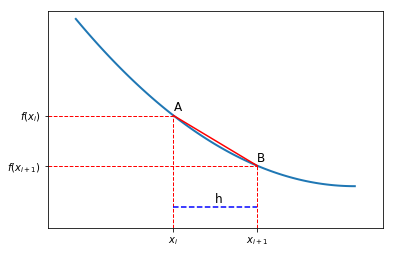

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


f = lambda x: x**2-2*x+2
x = np.linspace(-1,1,100)
y = f(x)

xd = np.array([-0.3,0.3])
yd =f(xd)

plt.xticks(xd,[r'$x_i$', r'$x_{i+1}$'])
plt.yticks(yd,[r'$f(x_i)$',r'$f(x_{i+1})$'])
plt.xlim(-1.2,1.2)
plt.ylim(0,5.2)

plt.plot(x,y,linewidth=2)
plt.plot(xd,yd,'r-')
plt.plot([-1.2,xd[0]],[yd[0],yd[0]],'r--',linewidth=1)
plt.plot([-1.2,xd[1]],[yd[1],yd[1]],'r--',linewidth=1)
plt.plot([xd[0],xd[0]],[0,yd[0]],'r--',linewidth=1)
plt.plot([xd[1],xd[1]],[0,yd[1]],'r--',linewidth=1)
plt.plot([xd[0],xd[1]],[0.5,0.5],'b--',linewidth=1.5)
plt.annotate('A',xy=(xd[0],yd[0]),xytext=(xd[0],yd[0]+0.1),color="black",fontsize=12)
plt.annotate('B',xy=(xd[1],yd[1]),xytext=(xd[1],yd[1]+0.1),color="black",fontsize=12)
plt.annotate('h',xy=((xd[0]+xd[1])/2,0.5),xytext=((xd[0]+xd[1])/2,0.6),color="black",fontsize=12)

A forma mais simples de derivar é se achar a inclunação da reta AB, que é aproximadamente igual à da tangente da curva no meio do intervalo entre $x_i$ e $x_{i+1}$. Assim, quanto menor o intervalo, mais próximo do real é o valor obtido.

A teoria por trás das diferenças definidas vem da expansão da série de Taylor de $f(x)$. A expansão para $f(x_{i+1})$ pode ser descrita como:

$$ f(x_{i+1}) = f(x_i)+f'(x_i)h +\frac{f''(x_i)}{2!}h^2+\frac{f'''(x_i)}{3!}h^3+...$$

Logo:

$$ f'(x_{i}) = \frac{f(x_{i+1})-f(x_i)}{h} - \frac{f''(x_i)}{2!}h-\frac{f'''(x_i)}{3!}h^2+...$$

Como as segundas derivadas em diante são divididas por fatoriais e seu valor fica cada vez menor, elas podem ser omitidas, oque nos dá:

$$ f'(x_{i}) = \frac{f(x_{i+1})-f(x_i)}{h} + O(h) $$

Esta fórmula é conhecida como _diferença dividida progressiva_, pois o segundo ponto é escolhido após $x_i$, ou seja, $h>0$. O(h) representa o erro advindo da truncagem da série de taylor (descartando termos com segundas derivadas em diante). Então na prática, a diferença dividida progressiva é:

$$ f'(x_{i}) = \frac{f(x_{i}+h)-f(x_i)}{h} $$

Reaplicando a fórmula em $f'$, pode-se encontrar derivadas segundas, terceiras, etc:

$$ f''(x_{i}) = \frac{f(x_{i}+2h)-2f(x_{i}+h)+f(x_i)}{h^2} $$

$$ f'''(x_{i}) = \frac{f(x+3h)-3f(x_{i}+2h)+3f(x_{i}+h)-f(x_i)}{h^3}$$


### Diferenças divididas regressivas ###

De forma similar, podemos ter _diferenças divididas regressivas_, ou seja, quando o segundo ponto para gerar a reta tem um x anterior a $x_i$, ou seja, usa-se um $h<0$ ou multiplica-se h por -1:

$$ f'(x_{i}) = \frac{f(x_{i})-f(x_i-h)}{h} + O(h) $$

$$ f''(x_{i}) = \frac{f(x_{i})-2f(x_{i}-h)+f(x_i-2h)}{h^2} $$

$$ f'''(x_{i}) = \frac{f(x)-3f(x_{i}-h)+3f(x_{i}-2h)-f(x_i-3h)}{h^3}$$


### Diferenças divididas centrais ###

Diferenças progressivas ou regressivas podem ser utilizadas de acordo com o contexto, se há uma preocupação com o futuro ou o passado no resultado. Contudo, muitas vezes a preocupação é simplesmente a derivada em um dado ponto. Desta forma, o ideal seria colocar o ponto desejado __no meio__ do intervalo, ou seja, fazendo uma reta com os x no intervalo $[x-$h/2$,x+h/2]$.

Desta forma, podemos calcular as diferenças divididas centrais como:

$$ f'(x_{i}) = \frac{f(x_{i}+h)-f(x_i-h)}{2h} $$

De forma similar, podemos gerar as outras derivadas:

$$ f''(x_{i}) = \frac{f(x_{i}+h)-2f(x_{i})+f(x_i-h)}{h^2} $$

$$ f'''(x_{i}) = \frac{f(x+2h)-2f(x_{i}+h)+2f(x_{i}-h)-f(x_i-2h)}{2h^3}$$


Complicado né? Vamos ver um exemplo para entender melhor:

## Exemplo ##

Vamos descobrir a primeira e a segunda derivada do polinomio abaixo no ponto 0.1:

$f(x) = 0.1x^5 - 0.2x^3 + 0.1x - 0.2$

Qual a solução analítica para a primeira e a segunda derivada?

In [37]:
f = lambda x: 0.1*x**5 - 0.2*x**3 + 0.1*x - 0.2
fd1 = lambda x:0.5*x**4 - 0.6*x**2 + 0.1
fd2 = lambda x:2*x**3-1.2*x

print("f'(0.1):",fd1(0.1),"f''(0.1):",fd2(0.1))

f'(0.1): 0.09405000000000001 f''(0.1): -0.118


Agora vamos tentar aproximar estes valores numericamente utilizando diferenças definidas progressivas usando um h de 0.05:

In [ ]:
def d1prog(f,x,h):
    return (f(x+h)-f(x))/h

d1prog(f,0.1,0.05)

Implemente as diferenças regressivas e centrais para a primeira e segunda derivada:

In [ ]:
def d2prog(f,x,h):
    return 

def d1reg(f,x,h):
    return 

def d2reg(f,x,h):
    return 

def d1cen(f,x,h):
    return 

def d2cen(f,x,h):
    return 

Agora verifique qual dos três tem o menor erro para a primeira e segunda derivada:

In [ ]:
print("Derivada analitica:",fd1(0.1),'Progressiva:',d1prog(f,0.1,0.05),"Regressiva:",d1reg(f,0.1,0.05),"Central:",d1cen(f,0.1,0.05))
print("Derivada segunda analitica:",fd2(0.1),'Progressiva:',d2prog(f,0.1,0.05),"Regressiva:",d2reg(f,0.1,0.05),"Central:",d2cen(f,0.1,0.05))


xis = np.linspace(0,0.5,100)
plt.plot(xis,f(xis))
plt.plot(xis,fd1(xis),'r--')
plt.plot(xis,d1prog(f,xis,0.05),'g--')
plt.plot(xis,d1cen(f,xis,0.05),'y--')

### Exercício ###

Ache o valor da primeira e segunda derivada da função $f(x)=\frac{2}{x^3+5}$ no ponto 1, com h=0.1, usando os três métodos e diga qual obteve o menor erro.

Mas e se eu não possuo a função $f$, como proceder? Ora, é simples: desde que você tenha pontos igualmente espaçados no eixo x (de preferência em um intervalo pequeno) você pode calcular as diferenças divididas diretamente!

### Exemplo/Exercício ###

Dada a tabela abaixo de valores de uma função _v_:

|valor de $t_i$|0|60|120|180|240|300|
|--------|-|-|-|-|-|-|-|-|
|$v(t_i)$|0|0.0824|0.2747|0.6502|1.3851|3.229|

1. Determine uma aproximação para v'(180) usando: i. Diferenças Progressivas ii. Regressivas iii. Centrais
2. Como poderia proceder para determinar uma aproximação para v'(300)?